# Dibetic Prediction

In [68]:
from sklearn.datasets import load_diabetes

In [69]:
df = load_diabetes()

In [70]:
print(df['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [71]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [72]:
df['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.DataFrame(df.data, columns=df['feature_names'])
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [75]:
x = data
y = df.target

In [76]:
x.head(2)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [79]:
x_train.corr()

age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.136522  0.181976  0.308406  0.261534  0.200301 -0.023100   
sex  0.136522  1.000000  0.044746  0.165128  0.033717  0.128023 -0.344052   
bmi  0.181976  0.044746  1.000000  0.384534  0.246802  0.255519 -0.372335   
bp   0.308406  0.165128  0.384534  1.000000  0.242052  0.164355 -0.113747   
s1   0.261534  0.033717  0.246802  0.242052  1.000000  0.891476  0.044128   
s2   0.200301  0.128023  0.255519  0.164355  0.891476  1.000000 -0.190767   
s3  -0.023100 -0.344052 -0.372335 -0.113747  0.044128 -0.190767  1.000000   
s4   0.165340  0.320619  0.431946  0.209316  0.556987  0.653120 -0.732862   
s5   0.270981  0.121299  0.448657  0.362476  0.528922  0.307541 -0.388778   
s6   0.262201  0.159936  0.394699  0.376421  0.323666  0.298647 -0.304091   

           s4        s5        s6  
age  0.165340  0.270981  0.262201  
sex  0.320619  0.121299  0.159936  
bmi  0.431946  0.448657  0.394699  
bp   0.209316  0.362476  0.376421  
s1   0.556987  0.528922  0.323666  
s2   0.653120  0.307541  0.298647  
s3  -0.732862 -0.388778 -0.304091  
s4   1.000000  0.629707  0.441489  
s5   0.629707  1.000000  0.464878  
s6   0.441489  0.464878  1.000000

<Axes: >

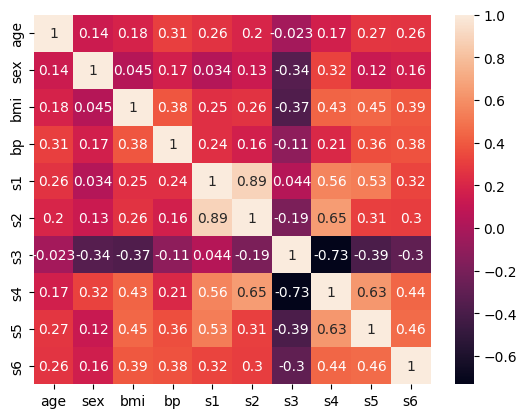

In [80]:
sns.heatmap(x_train.corr(), annot=True)

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dtr = DecisionTreeRegressor()

In [83]:
params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poison'],
    'max_depth' : [1,2,3,4,5],
    'splitter'  : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [90]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = dtr, param_grid=params, cv = 5, scoring='r2' )

In [91]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poison'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [92]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [93]:
y_pred = grid.predict(x_test)

In [94]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

In [95]:
r2_score(y_pred, y_test)

0.07574663587527941

In [99]:
best_model = grid.best_estimator_

In [100]:
best_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

In [102]:
best_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

[Text(0.5, 0.875, 'x[2] <= 0.005\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[3] <= 0.027\nfriedman_mse = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= -0.002\nfriedman_mse = 2917.201\nsamples = 150\nvalue = 109.407'),
 Text(0.0625, 0.125, 'friedman_mse = 2173.095\nsamples = 107\nvalue = 94.271'),
 Text(0.1875, 0.125, 'friedman_mse = 2780.251\nsamples = 43\nvalue = 147.07'),
 Text(0.375, 0.375, 'x[8] <= 0.02\nfriedman_mse = 4886.575\nsamples = 33\nvalue = 159.03'),
 Text(0.3125, 0.125, 'friedman_mse = 4043.324\nsamples = 21\nvalue = 130.905'),
 Text(0.4375, 0.125, 'friedman_mse = 2555.354\nsamples = 12\nvalue = 208.25'),
 Text(0.75, 0.625, 'x[8] <= 0.026\nfriedman_mse = 5295.789\nsamples = 126\nvalue = 205.532'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= -0.024\nfriedman_mse = 5180.16\nsamples = 61\nvalue = 179.934'),
 Text(0.5625, 0.125, 'friedman_mse = 5882.77\nsamples = 19

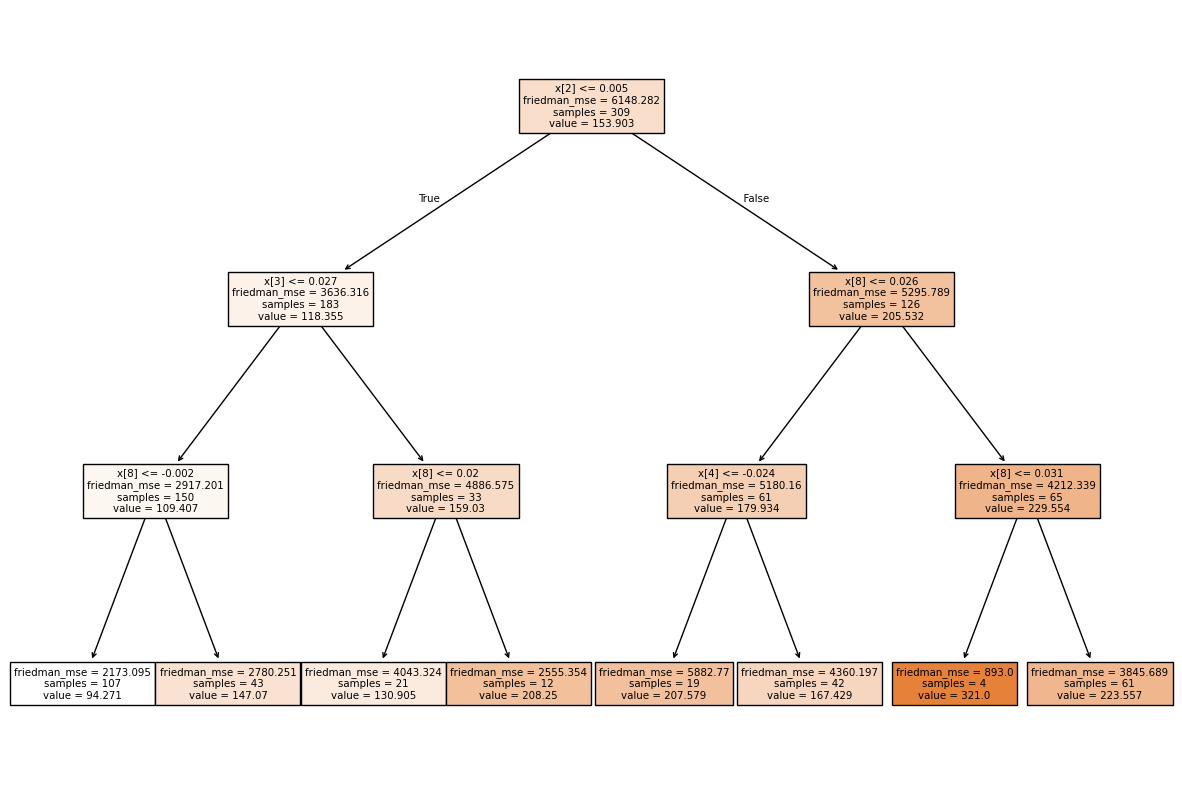

In [103]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model, filled=True)

In [104]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [105]:
new_model = DecisionTreeRegressor(criterion='friedman_mse',
                                  max_depth = 3,
                                  max_features = 'log2',
                                  splitter = 'best'
                                 )

In [106]:
new_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

In [108]:
new_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

[Text(0.5, 0.875, 'x[8] <= 0.022\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[8] <= -0.034\nfriedman_mse = 4633.616\nsamples = 206\nvalue = 126.388'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 0.003\nfriedman_mse = 2544.262\nsamples = 71\nvalue = 95.141'),
 Text(0.0625, 0.125, 'friedman_mse = 2888.31\nsamples = 44\nvalue = 106.909'),
 Text(0.1875, 0.125, 'friedman_mse = 1390.11\nsamples = 27\nvalue = 75.963'),
 Text(0.375, 0.375, 'x[0] <= -0.084\nfriedman_mse = 4948.872\nsamples = 135\nvalue = 142.822'),
 Text(0.3125, 0.125, 'friedman_mse = 2773.44\nsamples = 5\nvalue = 216.6'),
 Text(0.4375, 0.125, 'friedman_mse = 4815.138\nsamples = 130\nvalue = 139.985'),
 Text(0.75, 0.625, 'x[2] <= 0.018\nfriedman_mse = 4635.306\nsamples = 103\nvalue = 208.932'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 0.075\nfriedman_mse = 3354.418\nsamples = 46\nvalue = 172.13'),
 Text(0.5625, 0.125, 'friedman_mse = 2661.107\nsamples = 35\n

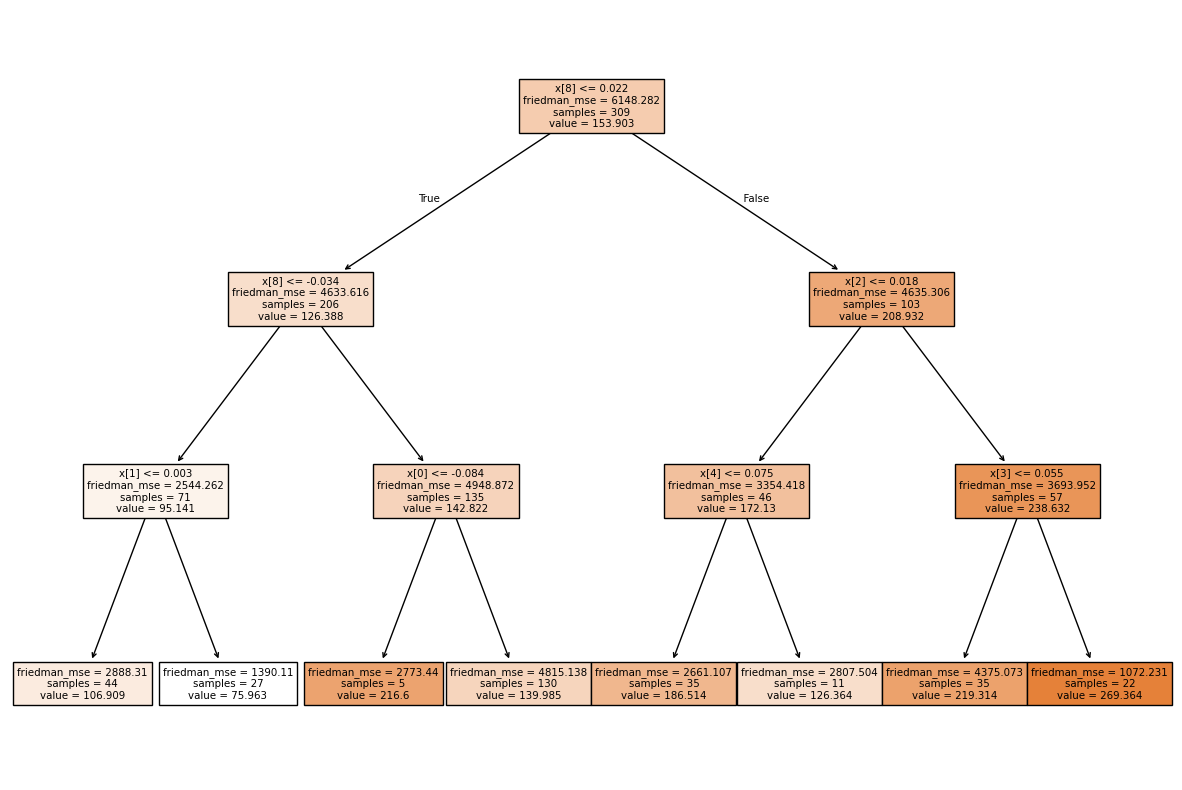

In [109]:
plt.figure(figsize=(15,10))
tree.plot_tree(new_model, filled=True)